**Game Challenge Time Predictor**

Step 1: Import libraries and dataset

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Step 2: Load the data

In [4]:
game_df=pd.read_csv("video_game_data.csv")
print(game_df)

    level  ammo  completion_time
0       2     8              129
1      28    47               65
2       5     3              103
3       1     3              145
4      17    14               78
5       3     3              148
6       2     4              125
7       4    14              143
8       2    15              120
9      14    35               84
10      2     1              146
11      4    29               86
12      5    29              101
13      1     6              139
14      5    10               94
15      1    13              141
16      6     4              121
17     13    34               74
18      4    34               95
19      5    10               77
20      2    11              113
21      1     9              132
22     10    27              101
23     15    20               88
24      4    50               93
25      3    10              147
26     25    42               69
27      4    15              104
28      2     1              133
29      3 

Step 3: Analyse the data

In [21]:
print(game_df.dtypes)

level              int64
ammo               int64
completion_time    int64
dtype: object


In [22]:
# Checking for null values in input data
print(game_df.isnull().sum())

level              0
ammo               0
completion_time    0
dtype: int64


In [23]:
# Checking for missing values in target variable
print(np.isnan(game_df["completion_time"]))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: completion_time, dtype: bool


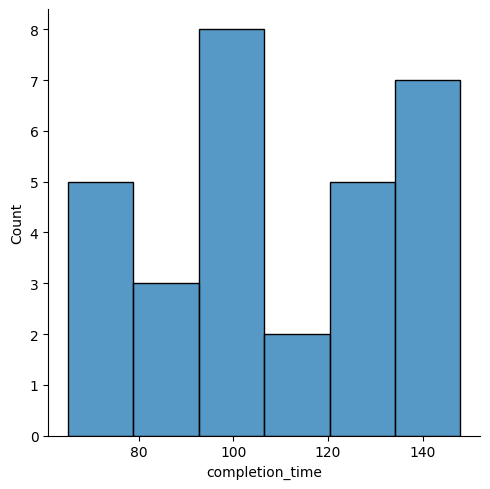

In [25]:
#Check the distribution of the the target value
ax = sns.displot(game_df["completion_time"])

<Axes: >

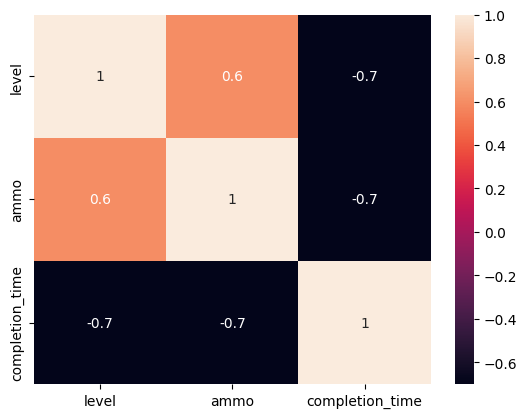

In [31]:
# Check for multcolinearity
# create a correlation matrix rounding to one decimal point
correlation_matrix = game_df.corr().round(1)
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

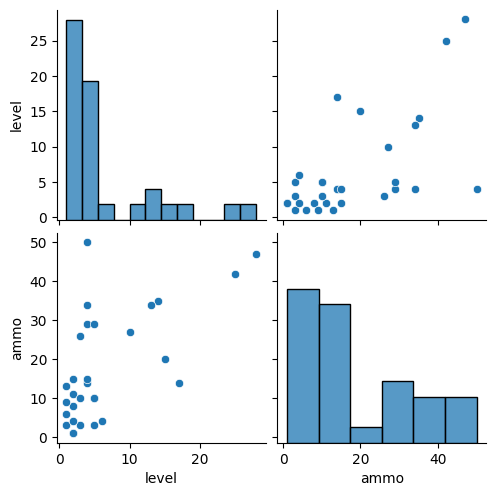

In [32]:
sns.pairplot(data = game_df[['level','ammo']],diag_kind='hist')

Step 4: Normalise data

In [15]:
# Performing data normalisation using RobustScaler.
scaler = RobustScaler()

# get the column names
names = game_df.columns

df = scaler.fit_transform(game_df)
game_data = pd.DataFrame(df, columns=names)
game_data.head()

,level,ammo,completion_time
0,-0.533333,-0.250000,0.586207
1,6.400000,1.522727,-0.885057
2,0.266667,-0.477273,-0.011494
3,-0.800000,-0.477273,0.954023
4,3.466667,0.022727,-0.586207


Step 5: Separate target value

In [26]:
X=game_df.drop(["completion_time"],axis=1)
y=game_df["completion_time"]

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   level   30 non-null     int64
 1   ammo    30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [30]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: completion_time
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 368.0 bytes


Step 6: Divide test and train data

In [35]:
# Followed Pareto Principle and divided train and test data into 80/20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(24, 2)
(6, 2)
(24,)
(6,)


Step 7: Set the ML Algorithm

In [36]:
# This program use Random Forest Regressor
# random_state parameter is set to 42 so that it results in consistent test and train data sets across multiple runs
# enabling result replication in different environments.
rfc_model=RandomForestRegressor(random_state=42)


Step 8: Hyperparameter Optimisation

In [43]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['squared_error', 'friedman_mse'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ["r2"]

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    reg = GridSearchCV(RFR(), tuned_parameters, cv=5,
                       scoring= score)
    reg.fit(X_train, y_train)
    print("Best parameters set found on the training set:")
    print(reg.best_params_)
    print("\n")

# Tuning hyperparameters for r2


Best parameters set found on the training set:
{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 3}




Step 9: Train the model

In [45]:
rfc_model=RandomForestRegressor(random_state=42,criterion="squared_error",max_depth=3,max_features="sqrt",min_samples_split=3)
rfc_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_split=3,
                      random_state=42)

Step 10: Predict the test data

In [46]:
y_pred=rfc_model.predict(X_test)

Step 11: Model Evaluation

In [50]:
prediction_comparison=pd.DataFrame({"actual":y_test,"prediction":y_pred})
print("Prediction Comparison")
print(prediction_comparison)
r2 = r2_score(y_test, y_pred)
print('R2 score is {}'.format(r2))

Prediction Comparison
    actual  prediction
27     104  113.553515
15     141  123.970599
23      88   89.626703
17      74   93.334162
8      120  121.256106
9       84   85.708956
R2 score is 0.7582414231197129
